In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
data = pd.read_csv('car data.csv')
data

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [4]:
data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [5]:
print(data.Fuel_Type.value_counts())
print(data.Selling_type.value_counts())
print(data.Transmission.value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Selling_type
Dealer        195
Individual    106
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


In [6]:
# Encoding the object types into int
data.replace({'Fuel_Type' : {'Petrol':0, 'Diesel':1, 'CNG':2}},inplace=True)
data.replace({'Selling_type': {'Dealer':0, 'Individual':1}},inplace=True)
data.replace({'Transmission': {'Manual':0, 'Automatic':1}},inplace=True)

C:\Users\Varneek\AppData\Local\Temp\ipykernel_8612\13448366.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({'Fuel_Type' : {'Petrol':0, 'Diesel':1, 'CNG':2}},inplace=True)
C:\Users\Varneek\AppData\Local\Temp\ipykernel_8612\13448366.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({'Selling_type': {'Dealer':0, 'Individual':1}},inplace=True)
C:\Users\Varneek\AppData\Local\Temp\ipykernel_8612\13448366.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future 

In [7]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [8]:
x = data.drop(['Car_Name', 'Selling_Price'],axis=1)
y = data['Selling_Price']

In [9]:
x.head()

,Year,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,2014,5.59,27000,0,0,0,0
1,2013,9.54,43000,1,0,0,0
2,2017,9.85,6900,0,0,0,0
3,2011,4.15,5200,0,0,0,0
4,2014,6.87,42450,1,0,0,0


In [10]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=2)

In [12]:
lin_reg_model = LinearRegression()

In [13]:
lin_reg_model.fit(x_train,y_train)

LinearRegression()

In [14]:
data_prediction = lin_reg_model.predict(x_train)

In [15]:
#using R squared error to find error 
error_score = metrics.r2_score(y_train,data_prediction)
print(error_score)

0.8796483009370217


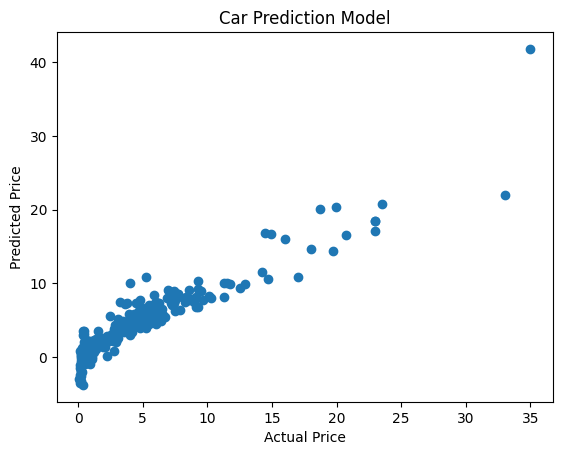

In [16]:
plt.scatter(y_train,data_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Car Prediction Model')
plt.show()

In [17]:
test_data_prediction = lin_reg_model.predict(x_test)

In [18]:
error_score = metrics.r2_score(y_test,test_data_prediction)
print(error_score)

0.8365861023209662


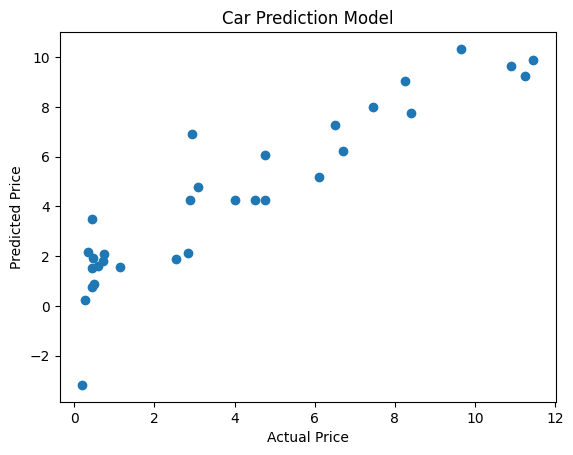

In [19]:
plt.scatter(y_test,test_data_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Car Prediction Model')
plt.show()